In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:98% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:18pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:18pt;padding:5px;}
table.dataframe{font-size:18px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1사용하기

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [6]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [8]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [10]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [11]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [17]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([2]) # 평균0, 표준편차가 1인 난수 실수 2개(정규분포이루는난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([0.6048542, 0.3568801], dtype=float32),
 array([-0.33370346], dtype=float32)]

In [12]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([-0.15370065], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 입력(독립)변수 x가 1개, 타겟(종속)변수 y가 1개

In [13]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight오 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
#cost function(손실함수 = mse;최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 W, b를 찾아내는 것
cost는 2차함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# W, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:8.932268142700195, W:[0.19186199], b:[0.04088506]
200번째 cost:0.014078806154429913, W:[1.1374781], b:[0.68748003]
400번째 cost:0.005375958979129791, W:[1.0849531], b:[0.8068818]
600번째 cost:0.002052806317806244, W:[1.0524958], b:[0.8806647]
800번째 cost:0.00078386883251369, W:[1.0324394], b:[0.9262578]
1000번째 cost:0.0002993273374158889, W:[1.0200461], b:[0.95443124]
1200번째 cost:0.0001142983601312153, W:[1.0123872], b:[0.9718412]
1400번째 cost:4.364081542007625e-05, W:[1.0076542], b:[0.9826002]
1600번째 cost:1.6664425857015885e-05, W:[1.0047297], b:[0.989248]
1800번째 cost:6.363762167893583e-06, W:[1.0029229], b:[0.9933557]
2000번째 cost:2.4302601104864152e-06, W:[1.0018063], b:[0.99589396]
2200번째 cost:9.284381121688057e-07, W:[1.0011164], b:[0.99746215]
2400번째 cost:3.549527036739164e-07, W:[1.0006906], b:[0.9984308]
2600번째 cost:1.358338437285056e-07, W:[1.000427], b:[0.99902916]
2800번째 cost:5.210145204159744e-08, W:[1.0002645], b:[0.99939895]
3000번째 cost:2.0008656065328978e-08, W:[1.000164]

In [14]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [18]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [19]:
def predict(x):
    return W_[0]*x + b_[0]

In [20]:
input_x = int(input('입력값은 ?'))
print('예측값은 ', predict(input_x))

입력값은 ?3
예측값은  4.000007212162018


## 2.2 predict를 위한 placeholder이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [23]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:5})
sess.run(H, feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [25]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# tensor 그래프
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:25.112844467163086, W:[1.2187154], b:[1.8063233]
200째 : cost:0.025212252512574196, W:[1.9460015], b:[1.2886208]
400째 : cost:0.002479872200638056, W:[1.9830649], b:[1.090518]
600째 : cost:0.00024391469196416438, W:[1.9946887], b:[1.0283885]
800째 : cost:2.3988919565454125e-05, W:[1.9983343], b:[1.0089029]
1000째 : cost:2.3585846520290943e-06, W:[1.9994776], b:[1.0027918]
1200째 : cost:2.3241504720772355e-07, W:[1.9998361], b:[1.000876]
1400째 : cost:2.2795665799435483e-08, W:[1.9999486], b:[1.0002747]
1600째 : cost:2.26805241254624e-09, W:[1.9999838], b:[1.0000867]
1800째 : cost:2.2811263988842256e-10, W:[1.9999948], b:[1.0000278]
2000째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2200째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2400째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2600째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
2800째 : cost:3.470859016863059e-11, W:[1.9999979], b:[1.000011]
3000째 : cost:3.470859016863059e-11, W:[

In [27]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.], dtype=float32)

In [28]:
sess.run(H, feed_dict={x:np.array([5, 6, 7])})

array([11.      , 12.999998, 14.999996], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale조정X)

In [32]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 3000번 학습
for step in range(3001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:4540.4052734375, W:[7.671006], b:[1.4549785]
200째 : cost:83.75760650634766, W:[10.174782], b:[-0.4268483]
400째 : cost:83.50755310058594, W:[10.263969], b:[-1.0872194]
600째 : cost:83.48463439941406, W:[10.290983], b:[-1.287241]
800째 : cost:83.48251342773438, W:[10.299166], b:[-1.347826]
1000째 : cost:83.48233032226562, W:[10.301644], b:[-1.366176]
1200째 : cost:83.48231506347656, W:[10.302395], b:[-1.371734]
1400째 : cost:83.48231506347656, W:[10.302623], b:[-1.3734183]
1600째 : cost:83.48231506347656, W:[10.302691], b:[-1.3739275]
1800째 : cost:83.4823226928711, W:[10.3027115], b:[-1.3740809]
2000째 : cost:83.4823226928711, W:[10.302717], b:[-1.3741258]
2200째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2400째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2600째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2800째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
3000째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]


In [ ]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(조정O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화) : 0~1로 조정
                      X - Xmin
    normalization = ────────────
                     Xmax - Xmin
         * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
         
- standardization(표준화) : 평균0, 표준편차1로 조정
                        X - Xmean(평균)
    standardization = ──────────────────
                          Xstd(표준편차)
          * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)

In [35]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min() ) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min() ) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [39]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화시킬 객체
# scaler_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = MinMaxScaler() # y_data를 정규화시킬 객체
scaled_y_data = scaler_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [59]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:8.75621509552002, W:[-0.5608323], b:[-2.0923698]
600째 : cost:0.45923537015914917, W:[0.4401249], b:[-0.30337498]
1200째 : cost:0.04131471365690231, W:[0.69228953], b:[0.08179627]
1800째 : cost:0.01822122186422348, W:[0.77329195], b:[0.1549457]
2400째 : cost:0.015411307103931904, W:[0.8128033], b:[0.16000544]
3000째 : cost:0.014019578695297241, W:[0.84024405], b:[0.15131079]
3600째 : cost:0.013003939762711525, W:[0.8625582], b:[0.14082198]
4200째 : cost:0.012237845920026302, W:[0.88161516], b:[0.13104624]
4800째 : cost:0.011658679693937302, W:[0.8981091], b:[0.12239929]
5400째 : cost:0.011220780201256275, W:[0.9124335], b:[0.11484773]
6000째 : cost:0.010889681987464428, W:[0.9248855], b:[0.10827399]
6600째 : cost:0.01063933502882719, W:[0.93571216], b:[0.10255618]
7200째 : cost:0.010450044646859169, W:[0.9451264], b:[0.0975839]
7800째 : cost:0.010306927375495434, W:[0.9533122], b:[0.09326024]
8400째 : cost:0.010198703967034817, W:[0.9604304], b:[0.08950064]
9000째 : cost:0.01011688821017742

In [54]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력 :', scaled_input, sep='\n')
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')
print('결과 :', scaler_y.inverse_transform(scaled_output), sep='\n')

모델 예측을 위한 입력 :
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.20855534]
 [0.31198233]]
결과 :
[[22.187092]
 [31.702374]]


In [57]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)

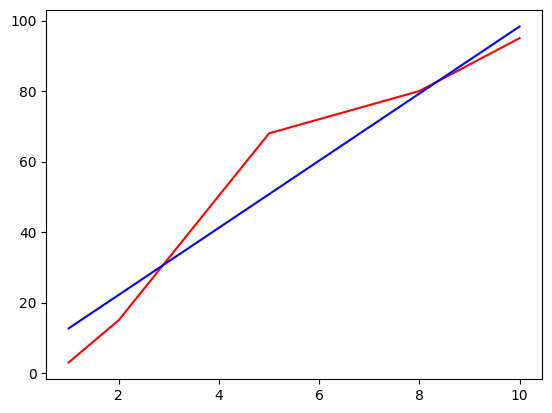

In [58]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [63]:
# 라이브러리를 쓰고 표준화 (StandardScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaler_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[-1.22474487 -1.34819316]
 [-0.93313895 -1.01936556]
 [-0.05832118  0.43295634]
 [ 0.81649658  0.76178394]
 [ 1.39970842  1.17281844]]


In [64]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:2.564563035964966, W:[-0.5969], b:[-0.20615132]
600째 : cost:0.28910595178604126, W:[0.4973322], b:[-0.06201708]
1200째 : cost:0.08317683637142181, W:[0.8265124], b:[-0.01865673]
1800째 : cost:0.06454017013311386, W:[0.9255405], b:[-0.00561255]
2400째 : cost:0.06285353004932404, W:[0.95533144], b:[-0.00168843]
3000째 : cost:0.06270089000463486, W:[0.9642939], b:[-0.00050792]
3600째 : cost:0.06268708407878876, W:[0.96698993], b:[-0.00015279]
4200째 : cost:0.06268582493066788, W:[0.9678009], b:[-4.5956807e-05]
4800째 : cost:0.06268571317195892, W:[0.9680453], b:[-1.381691e-05]
5400째 : cost:0.06268569827079773, W:[0.9681161], b:[-4.147967e-06]
6000째 : cost:0.06268569827079773, W:[0.96813506], b:[-1.2326298e-06]
6600째 : cost:0.06268569082021713, W:[0.96813506], b:[-3.5274138e-07]
7200째 : cost:0.06268569082021713, W:[0.96813506], b:[-8.753022e-08]
7800째 : cost:0.06268569827079773, W:[0.96813506], b:[-1.5289404e-08]
8400째 : cost:0.06268569082021713, W:[0.96813506], b:[1.469168e-08]
9000째 :

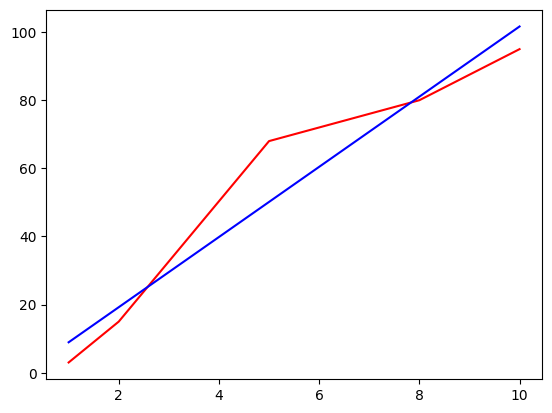

In [65]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

## 2.5 입력(독립)변수 x가 3개, 타겟(종속)변수 y가 1개 (csv->array)

In [6]:
# 방법1 : csv -> array
import numpy as np
#data = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',', encoding='utf-8') # 결측치, header가 없어야 함
data = np.genfromtxt('data/ozone.csv',
                    delimiter=',',
                    skip_header=1,
                    missing_values='NA',
                    filling_values=np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [12]:
# 방법2 : csv파일 -> 데이터프레임 -> 결측치처리 -> 넘파이배열 -> 머신러닝
# 1. csv를 데이터프레임으로 읽기
import pandas as pd
data = pd.read_csv('data/ozone.csv')
data.info() # Ozone, Solar.R 열에만 결측치
data.isna().sum() # 열별 결측치 갯수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [20]:
# 2. 결측치처리
# 결측치 처리 방법1 : 결측치가 있는 행을 제거
# data.dropna(how='any', axis=0, inplace=True)
# 결측치 처리 방법2 : 결측치 대체(열별 평균값으로 대체)
data.mean() # 열별평균
# data.fillna(value=data.mean(), inplace=True)
# 결측치 처리 방법3 : 결측치 대체(월별 열별 평균값으로 대체)
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
display(mean_data)
print('5월에 Ozone으로 대체할 값 :', mean_data.loc[5, 'Ozone'])

,Ozone,Solar.R
Month,,
5,23.615385,181.296296
6,29.444444,190.166667
7,59.115385,216.483871
8,59.961538,171.857143
9,31.448276,167.433333


5월에 Ozone으로 대체할 값 : 23.615384615384617


In [27]:
# 결측치가 있는 데이터
data[data['Ozone'].isna() | data['Solar.R'].isna()].head(1)

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5


In [38]:
def fill_nan(row):
    #print(row)
    #print(row.isna())
    'row["Ozone"]이나 row["Solar.R"]가 결측치면 mean_data[월, 열이름]으로 대체'
    #if np.isna(row['Ozone']):
    pd.options.mode.copy_on_write = True 
    # row = row.copy()
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row['Month'], 'Solar.R']
    return row
fill_nan(data.loc[4])

Ozone       23.615385
Solar.R    181.296296
Wind        14.300000
Temp        56.000000
Month        5.000000
Day          5.000000
Name: 4, dtype: float64

In [45]:
data = data.apply(fill_nan, axis=1)
X_data = data[['Solar.R', 'Wind', 'Temp']].values # 독립변수
y_data = data[['Ozone']].values # 타겟변수
X_data.shape, y_data.shape

((153, 3), (153, 1))

In [52]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 20001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost:552.404541015625
2000번째 cost:507.9031982421875
3000번째 cost:485.5916442871094
4000번째 cost:474.4032287597656
5000번째 cost:468.79022216796875
6000번째 cost:465.97222900390625
7000번째 cost:464.554931640625
8000번째 cost:463.84002685546875
9000번째 cost:463.47711181640625
10000번째 cost:463.2905578613281
11000번째 cost:463.1925048828125
12000번째 cost:463.1388244628906
13000번째 cost:463.1073913574219
14000번째 cost:463.0870056152344
15000번째 cost:463.07220458984375
16000번째 cost:463.060302734375
17000번째 cost:463.04974365234375
18000번째 cost:463.03997802734375
19000번째 cost:463.0304260253906
20000번째 cost:463.0210876464844
최종 cost:463.0210876464844, W:[[ 0.05542192]
 [-3.6046207 ]
 [ 0.85051054]], b:[0.70038575]


In [59]:
np.column_stack([X_data, y_data])[:3]

array([[190. ,   7.4,  67. ,  41. ],
       [118. ,   8. ,  72. ,  36. ],
       [149. ,  12.6,  74. ,  12. ]])

In [64]:
# 예측하기
input_data = np.array([[118. ,   8. ,  72.]])
sess.run(H, feed_dict={X:input_data})

array([[39.639965]], dtype=float32)

### 스케일 조정
```
  MinMaxScaler, StandardScaler
    0~1        -2 ~ 2. 주로 0근처
```

In [65]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_X_data = x_scaler.fit_transform(X_data)
scaled_y_data = y_scaler.fit_transform(y_data)
scaled_X_data.shape, scaled_y_data.shape

((153, 3), (153, 1))

In [67]:
np.column_stack([scaled_X_data, scaled_y_data])[:2]

array([[0.55963303, 0.3       , 0.26829268, 0.23952096],
       [0.33944954, 0.33157895, 0.3902439 , 0.20958084]])

In [73]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W, b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 30001):
    _, cost_val = sess.run([train, cost], feed_dict={X:scaled_X_data,
                                                    y:scaled_y_data})
    if step%1000 == 0:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost:0.3643050789833069
2000번째 cost:0.34923088550567627
3000번째 cost:0.3351799249649048
4000번째 cost:0.3220803737640381
5000번째 cost:0.30986762046813965
6000번째 cost:0.29848095774650574
7000번째 cost:0.28785988688468933
8000번째 cost:0.2779558300971985
9000번째 cost:0.26871418952941895
10000번째 cost:0.2600935995578766
11000번째 cost:0.2520495057106018
12000번째 cost:0.24454069137573242
13000번째 cost:0.23753167688846588
14000번째 cost:0.23098647594451904
15000번째 cost:0.22487406432628632
16000번째 cost:0.21916288137435913
17000번째 cost:0.21382755041122437
18000번째 cost:0.20884235203266144
19000번째 cost:0.20417949557304382
20000번째 cost:0.19981934130191803
21000번째 cost:0.1957419216632843
22000번째 cost:0.19192424416542053
23000번째 cost:0.18835194408893585
24000번째 cost:0.18500560522079468
25000번째 cost:0.18186916410923004
26000번째 cost:0.17893238365650177
27000번째 cost:0.1761770397424698
28000번째 cost:0.17359180748462677
29000번째 cost:0.1711643636226654
30000번째 cost:0.16888496279716492
최종 cost:0.16888496279716492,

In [78]:
# 예측하기
input_data = np.array([[190. ,   7.4,  67. ]])
scaled_y_hat = sess.run(H, feed_dict={X:x_scaler.transform(input_data)})
y_scaler.inverse_transform(scaled_y_hat)

array([[41.87496]], dtype=float32)